# Section 1, 3 and 5 of portfolio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/rym_clean1.csv', index_col='position')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
#engineering columns
df['pg_nf'] = df['primary_genres'].fillna('')
df['sg_nf'] = df['secondary_genres'].fillna('')

df['p_genres'] = df['pg_nf'].astype(str)# + ', ' + df['sg_nf'].astype(str)
df['p_genres'] = df['p_genres'].str.strip(', ')
df['p_genres_list'] = df['p_genres'].str.split(', ')

df['s_genres']  = df['sg_nf'].astype(str)
df['s_genres'] = df['s_genres'].str.strip(', ')
df['s_genres_list'] = df['s_genres'].str.split(', ')

df['genres'] = df['p_genres'] + ', ' + df['s_genres']
df['genres'] = df['genres'].str.strip(', ')
df['genres_list'] = df['genres'].str.split(', ')

df['desc_list'] = df['descriptors'].str.replace(',...','')
df['desc_list'] = df['desc_list'].str.split(', ')

In [4]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month
df['decade'] = df.year//10 * 10

In [5]:
#Getting a list of unique primary and secondary genres
p_genre_list = []
s_genre_list = []
for index, row in df.iterrows():
    p_unpacked = row.p_genres.split(', ')
    p_genre_list.extend(p_unpacked)

    s_unpacked = row.s_genres.split(', ')
    s_genre_list.extend(s_unpacked)


p_genre_uniques = sorted(list(set(p_genre_list)))
p_i_nan = p_genre_uniques.index('')
p_genre_uniques.pop(p_i_nan)

s_genre_uniques = sorted(list(set(s_genre_list)))
s_i_nan = s_genre_uniques.index('')
s_genre_uniques.pop(s_i_nan);


s_genre_mod = s_genre_uniques.copy()

for n,i in enumerate(s_genre_uniques):
    if ',' in i:
        split = i.split(',')
        s_genre_mod.extend(split)
        funny_i = s_genre_mod.index(i)
        s_genre_mod.pop(funny_i)

s_genre_mod = sorted(list(set(s_genre_mod)))
s_genre_uniques = s_genre_mod


genre_uniques = sorted(list(set(p_genre_uniques) | set(s_genre_uniques)))

# 1) User Preferences

### Getting df of metrics per genre

Strategy:

Need to be able to group by genre:

mask to take albums with that genre in their p or s slot (dep which I'm analysing)\
then retrieve n entries, n ratings, n reviews and average average rating

In [6]:
p_g = []
p_g_count=[]
p_g_rating_count = []
p_g_review_count = []
p_g_avg_rating_mean = []


for genre in p_genre_uniques:
    genre_df = df[df['p_genres_list'].apply(lambda x: genre in x)]    
    p_g.append(genre)
    p_g_count.append(p_genre_list.count(genre))
    p_g_rating_count.append(genre_df.loc[:,'rating_count'].sum())
    p_g_review_count.append(genre_df.loc[:,'review_count'].sum())
    p_g_avg_rating_mean.append(genre_df.loc[:,'avg_rating'].mean())




s_g =[]
s_g_count = []
s_g_rating_count = []
s_g_review_count = []
s_g_avg_rating_mean = []


for genre in s_genre_uniques:
    genre_df = df[df['s_genres_list'].apply(lambda x: genre in x)]    
    s_g.append(genre)
    s_g_count.append(s_genre_list.count(genre))
    s_g_rating_count.append(genre_df.loc[:,'rating_count'].sum())
    s_g_review_count.append(genre_df.loc[:,'review_count'].sum())
    s_g_avg_rating_mean.append(genre_df.loc[:,'avg_rating'].mean())

In [7]:
pg_df = pd.DataFrame({'genre': p_g, 'count':p_g_count, 'rating_count':p_g_rating_count, 'review_count':p_g_review_count, 'mean_avg_rating':p_g_avg_rating_mean})
# pg_df
# pg_df.sort_values('rating_count',ascending=False)

In [8]:
sg_df = pd.DataFrame({'genre': s_g, 'count':s_g_count, 'rating_count':s_g_rating_count, 'review_count':s_g_review_count, 'mean_avg_rating':s_g_avg_rating_mean})
# sg_df.sort_values('count',ascending=False)
# sg_df.sort_values('rating_count', ascending=False).iloc[:15]

### Primary Genres: counts, rates, revs and avg rating

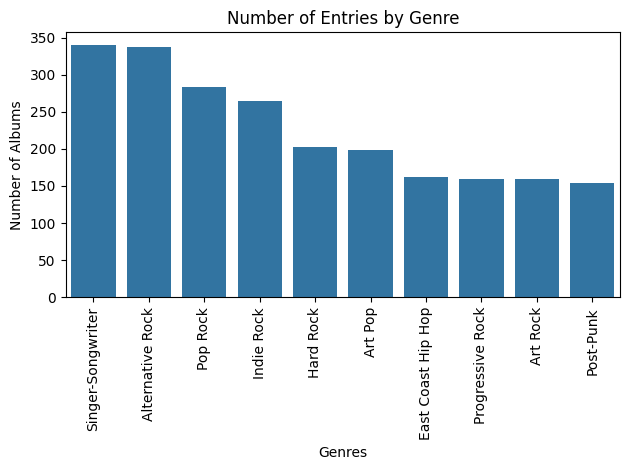

In [9]:
sns.barplot(pg_df.sort_values('count',ascending=False).iloc[:10], x = 'genre', y = 'count')
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Entries by Genre')
plt.ylabel('Number of Albums')
plt.tight_layout()
plt.savefig('plots/genre/pg_counts')

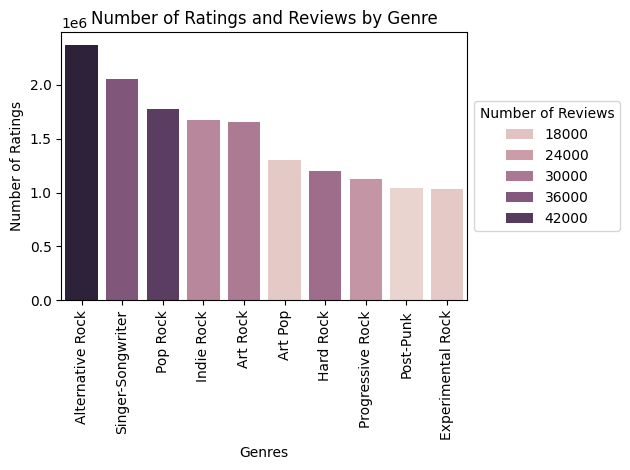

In [10]:
sns.barplot(pg_df.sort_values('rating_count',ascending=False).iloc[:10], x = 'genre', y = 'rating_count', hue='review_count')
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Ratings and Reviews by Genre')
plt.ylabel('Number of Ratings')
plt.legend(title='Number of Reviews', loc = 'center left', bbox_to_anchor = (1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/pg_rare')

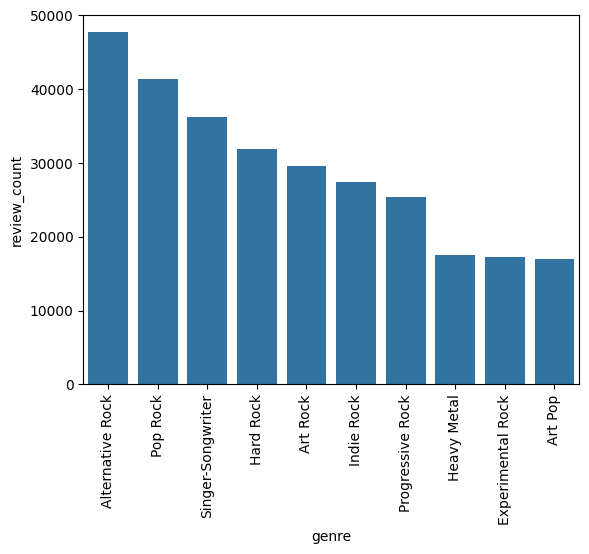

In [11]:
sns.barplot(pg_df.sort_values('review_count',ascending=False).iloc[:10], x = 'genre', y = 'review_count')
plt.xticks(rotation=90);

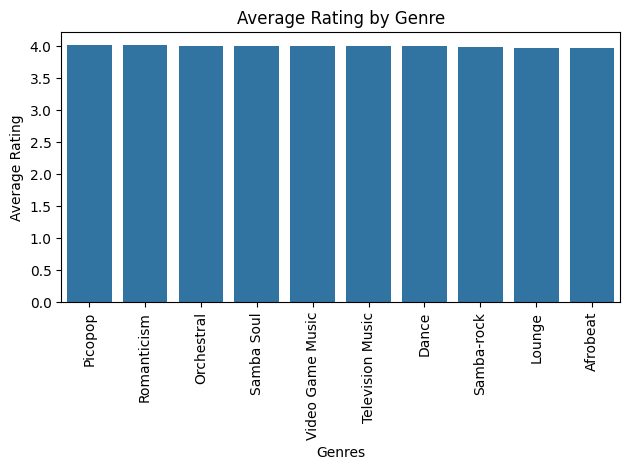

In [12]:
sns.barplot(pg_df.sort_values('mean_avg_rating',ascending=False).iloc[:10], x = 'genre', y = 'mean_avg_rating')
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Average Rating by Genre')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/genre/pg_avgr')

In [13]:
tab_md = pg_df.sort_values('mean_avg_rating',ascending=False).iloc[:10].to_markdown()

path = 'tables/pg_avgr.txt'
with open(path, 'w') as f:
    f.write(tab_md)

### Secondary Genres: counts, rates, revs and avg rating

In [14]:
df[df.s_genres_list.apply(lambda x: 'Art Pop' in x)]

,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,...,p_genres,p_genres_list,s_genres,s_genres_list,genres,genres_list,desc_list,year,month,decade
position,,,,,,,,,,,,,,,,,,,,,
5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638,...,"Pop Rap, Hip Hop","[Pop Rap, Hip Hop]",Art Pop,[Art Pop],"Pop Rap, Hip Hop, Art Pop","[Pop Rap, Hip Hop, Art Pop]","[epic, boastful, passionate, sampling, hedonis...",2010,11,2010
6,In Rainbows,Radiohead,2007-10-10,album,"Art Rock, Alternative Rock","Electronic, Dream Pop, Art Pop","lush, malevocals, introspective, melancholic, ...",4.20,51335,752,...,"Art Rock, Alternative Rock","[Art Rock, Alternative Rock]","Electronic, Dream Pop, Art Pop","[Electronic, Dream Pop, Art Pop]","Art Rock, Alternative Rock, Electronic, Dream ...","[Art Rock, Alternative Rock, Electronic, Dream...","[lush, malevocals, introspective, melancholic,...",2007,10,2000
21,Amnesiac,Radiohead,2001-06-04,album,"Art Rock, Experimental Rock","Electronic, Jazz-Rock, Art Pop","anxious, sombre, melancholic, atmospheric, cry...",3.79,39826,549,...,"Art Rock, Experimental Rock","[Art Rock, Experimental Rock]","Electronic, Jazz-Rock, Art Pop","[Electronic, Jazz-Rock, Art Pop]","Art Rock, Experimental Rock, Electronic, Jazz-...","[Art Rock, Experimental Rock, Electronic, Jazz...","[anxious, sombre, melancholic, atmospheric, cr...",2001,6,2000
24,Funeral,Arcade Fire,2004-09-14,album,"Indie Rock, Chamber Pop","Art Pop, Post-Punk Revival","death, passionate, melancholic, melodic, bitte...",3.97,38400,829,...,"Indie Rock, Chamber Pop","[Indie Rock, Chamber Pop]","Art Pop, Post-Punk Revival","[Art Pop, Post-Punk Revival]","Indie Rock, Chamber Pop, Art Pop, Post-Punk Re...","[Indie Rock, Chamber Pop, Art Pop, Post-Punk R...","[death, passionate, melancholic, melodic, bitt...",2004,9,2000
38,The Life of Pablo,Kanye West,2016-02-14,album,"Pop Rap, Hip Hop","Contemporary R&B, Trap, Experimental Hip Hop, ...","boastful, vulgar, religious, sexual, sampling,...",3.74,35457,286,...,"Pop Rap, Hip Hop","[Pop Rap, Hip Hop]","Contemporary R&B, Trap, Experimental Hip Hop, ...","[Contemporary R&B, Trap, Experimental Hip Hop,...","Pop Rap, Hip Hop, Contemporary R&B, Trap, Expe...","[Pop Rap, Hip Hop, Contemporary R&B, Trap, Exp...","[boastful, vulgar, religious, sexual, sampling...",2016,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,The Sailor,Rich Brian,2019-07-26,album,Pop Rap,"Trap, Art Pop, Alternative R&B, Baroque Pop","malevocals, boastful, melodic, sexual, introsp...",3.11,2237,23,...,Pop Rap,[Pop Rap],"Trap, Art Pop, Alternative R&B, Baroque Pop","[Trap, Art Pop, Alternative R&B, Baroque Pop]","Pop Rap, Trap, Art Pop, Alternative R&B, Baroq...","[Pop Rap, Trap, Art Pop, Alternative R&B, Baro...","[malevocals, boastful, melodic, sexual, intros...",2019,7,2010
4881,The Doldrums,Ariel Pink's Haunted Graffiti,2004-10-11,album,"Hypnagogic Pop, Psychedelic Pop","Dream Pop, Progressive Pop, Art Pop","lo-fi, psychedelic, surreal, raw, lonely, quir...",3.51,2227,39,...,"Hypnagogic Pop, Psychedelic Pop","[Hypnagogic Pop, Psychedelic Pop]","Dream Pop, Progressive Pop, Art Pop","[Dream Pop, Progressive Pop, Art Pop]","Hypnagogic Pop, Psychedelic Pop, Dream Pop, Pr...","[Hypnagogic Pop, Psychedelic Pop, Dream Pop, P...","[lo-fi, psychedelic, surreal, raw, lonely, qui...",2004,10,2000
4908,The Turn of a Friendly Card,The Alan Parsons Project,1980-10-01,album,"Art Rock, Progressive Rock","Pop Rock, Progressive Pop, Art Pop","conceptalbum, malevocals, suite, lush, bitters...",3.71,2213,57,...,"Art Rock, Progressive Rock","[Art Rock, Progressive Rock]","Pop Rock, Progressive Pop, Art Pop","[Pop Rock, Progressive Pop, Art Pop]","Art Rock, Progressive Rock, Pop Rock, Progress...","[Art Rock, Progressive Rock, Pop Rock, Progres.

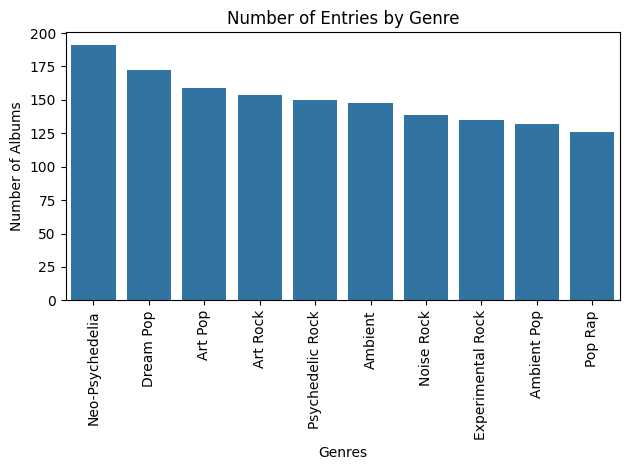

In [15]:
sns.barplot(sg_df.sort_values('count',ascending=False).iloc[:10], x = 'genre', y = 'count')
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Entries by Genre')
plt.ylabel('Number of Albums')
plt.tight_layout()
plt.savefig('plots/genre/sg_counts')

##### n Rates

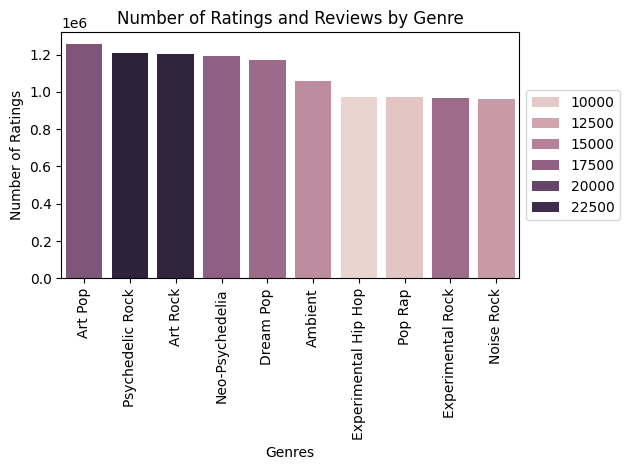

In [16]:
sns.barplot(sg_df.sort_values('rating_count', ascending=False).iloc[:10],x = 'genre', y='rating_count', hue = 'review_count')
plt.xticks(rotation=90);
plt.xlabel('Genres')
plt.title('Number of Ratings and Reviews by Genre')
plt.ylabel('Number of Ratings')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
plt.savefig('plots/genre/sg_rare')

#### nrevs

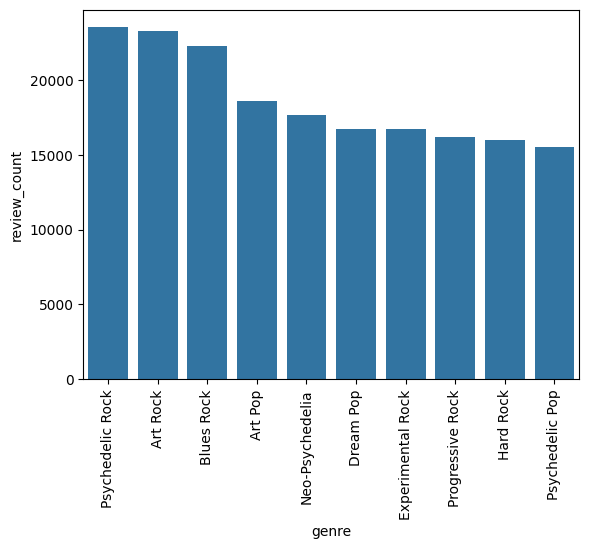

In [17]:
sns.barplot(sg_df.sort_values('review_count', ascending=False).iloc[:10],x = 'genre', y='review_count')
plt.xticks(rotation=90);

##### avg rate

In [18]:
sg_df.head(2)

,genre,count,rating_count,review_count,mean_avg_rating
0,16-bit,0,0,0,NaN
1,2-Step,1,22398,310,3.95


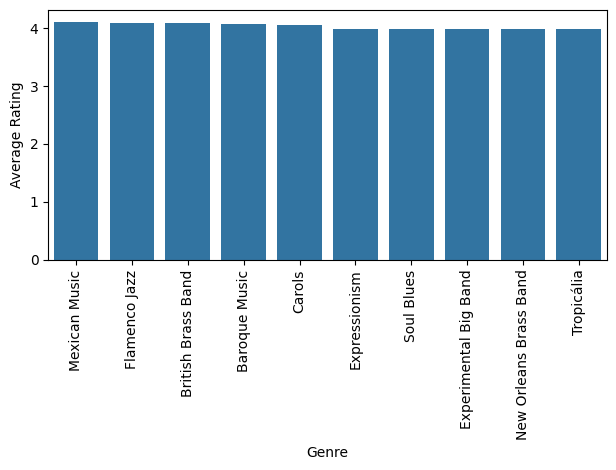

In [19]:
sns.barplot(sg_df.sort_values('mean_avg_rating',ascending=False).iloc[:10], x = 'genre', y = 'mean_avg_rating')
plt.xticks(rotation=90);
plt.tight_layout()
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.savefig('plots/genre/sg_avgr')

# 3) Genre Trends

Looking at how many occurrences there are of a particular genre over the years
lineplots

Strategy: for element in genre uniques, get a the dataframe of only entries including that genre. 
Then group by year, take the number of each element in a year, save the year, the number of entries to a variable

output a df for each genre that contains the years it has entries and their counts

Then can lineplot each one

In [20]:
df.head(1)

,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,...,p_genres,p_genres_list,s_genres,s_genres_list,genres,genres_list,desc_list,year,month,decade
position,,,,,,,,,,,,,,,,,,,,,
1,OK Computer,Radiohead,1997-06-16,album,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541,...,"Alternative Rock, Art Rock","[Alternative Rock, Art Rock]",,[],"Alternative Rock, Art Rock","[Alternative Rock, Art Rock]","[melancholic, anxious, futuristic, malevocals,...",1997,6,1990


In [21]:
common_pgenres =pg_df.sort_values('count',ascending=False).iloc[:20].genre
# [pg_df['count'] > 10].genre


In [22]:
p_g_ser = []
for genre in common_pgenres:
    genre_df = df[df.p_genres_list.apply(lambda x : genre in x)]
    groupd = genre_df.groupby('year')['year'].count()
    groupd.rename(str(genre), inplace=True)
    p_g_ser.append(groupd)
    

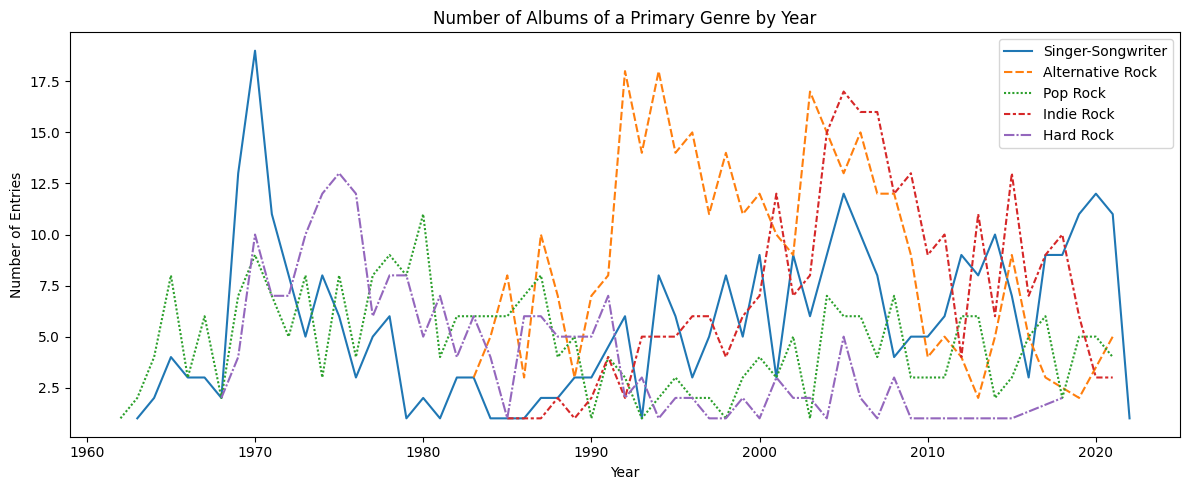

In [24]:
ts_pg = pd.DataFrame(p_g_ser).transpose()
ts_pg
# ts_pg.rename({'year':'Year'},axis = 1, inplace=True)
ts_pg.index.name ='Year'
plt.figure(figsize=(12,5))
sns.lineplot(ts_pg.iloc[:,:5])
plt.ylabel('Number of Entries')
plt.title('Number of Albums of a Primary Genre by Year')
plt.tight_layout()
plt.savefig('plots/genre/ts_pg')

# plt.figure(figsize=(20,6))
# sns.lineplot(ts_pg.iloc[:,5:10])
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Particular Genre by Year')

# plt.figure(figsize=(20,6))
# sns.lineplot(ts_pg.iloc[:,10:15])
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Particular Genre by Year')

# plt.figure(figsize=(20,6))
# sns.lineplot(ts_pg.iloc[:,15:])
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Particular Genre by Year');


In [25]:
common_sgenres =sg_df.sort_values('count',ascending=False).iloc[:20].genre
s_g_ser = []
for genre in common_sgenres:
    genre_df = df[df.s_genres_list.apply(lambda x : genre in x)]
    groupd = genre_df.groupby('year')['year'].count()
    groupd.rename(str(genre), inplace=True)
    s_g_ser.append(groupd)
    

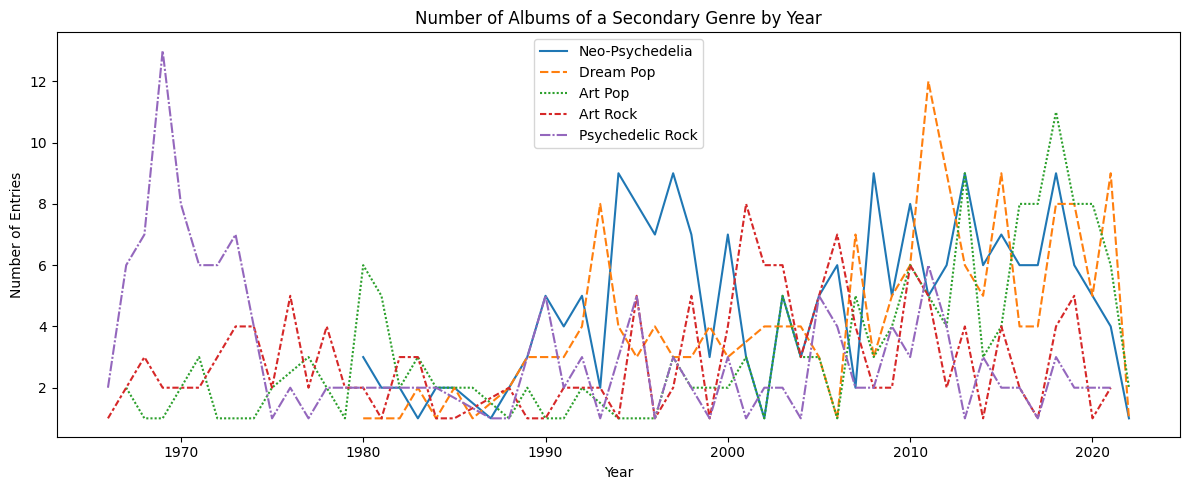

In [26]:
ts_sg = pd.DataFrame(s_g_ser).transpose()
ts_sg
# ts_pg.rename({'year':'Year'},axis = 1, inplace=True)
ts_sg.index.name ='Year'

plt.figure(figsize=(12,5))
sns.lineplot(ts_sg.iloc[:,:5])
plt.ylabel('Number of Entries')
plt.title('Number of Albums of a Secondary Genre by Year')
plt.tight_layout()
plt.savefig('plots/genre/ts_sg')

# plt.figure(figsize=(20,6))
# sns.lineplot(ts_sg.iloc[:,5:10])
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Particular Genre by Year')

# plt.figure(figsize=(20,6))
# sns.lineplot(ts_sg.iloc[:,10:15])
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Particular Genre by Year')

# plt.figure(figsize=(20,6))
# sns.lineplot(ts_sg.iloc[:,15:])
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Particular Genre by Year');

In [27]:
# genre_order = df_plot.genres_list_new.explode().value_counts().index.to_list()
# # groupd = 
# groupd = groupd[genre_order]
# # groupd

NameError: name 'df_plot' is not defined

In [ ]:
# df_plot = df.explode('genres_list_new').copy()

# top_joint_genres = df_plot.genres_list_new.value_counts()[:5].index.to_list()
# df_plot = df_plot[df_plot.genres_list_new.isin(top_joint_genres)]
# # sns.lineplot(df_plot.groupby('year').count(), x='year',y='count',hue='genres_list_new')
# # df_plot.groupby('year').agg({'release_name':'count','genres_list_new':)
# groupd = df_plot.groupby(['year','genres_list_new']).count().unstack(fill_value=0)
# groupd = groupd[['release_name']]
# # groupd.set_index('year', drop=True, inplace = True)

# groupd.columns = groupd.columns.get_level_values(1)
# genre_order = df_plot.genres_list_new.explode().value_counts().index.to_list()
# groupd = groupd[genre_order]

# plt.figure(figsize=(12,5))
# sns.lineplot(groupd)
# plt.legend(title=None)
# plt.ylabel('Number of Entries')
# plt.title('Number of Albums of a Genre by Year')
# plt.tight_layout()
# plt.savefig('plots/genre/ts_tg')


In [28]:
# df.genres_list_new.explode().value_counts()[:5]

# 5i) Most Similar/ Correlated Genres

In [71]:
df.genres_list.explode().value_counts()

genres_list
Alternative Rock     425
Singer-Songwriter    425
Pop Rock             373
Art Pop              357
Indie Rock           337
                    ... 
UKBass,2-Step          1
Ballroom               1
Junkanoo               1
Ranchera               1
Radio Drama            1
Name: count, Length: 743, dtype: int64

In [29]:
genre_matrix = pd.DataFrame(
    {genre: df['genres_list'].apply(lambda x: 1 if genre in x else 0) for genre in genre_uniques}
)

# Use matrix multiplication to count co-occurrences
overlap_matrix = genre_matrix.T.dot(genre_matrix)

# Convert the overlap matrix to a dictionary for better readability
overlap_dict = overlap_matrix.stack().to_dict()

In [30]:
overlap_matrix = overlap_matrix[overlap_matrix>0]

overlap_df = pd.DataFrame()
overlap_dict = {}
i=0
for genre in overlap_matrix.columns:
    # i+=5
    # if i==50: break


    sorted_gen_match = overlap_matrix[genre].sort_values(ascending=False)
    sorted_gen_match = sorted_gen_match.drop(genre, axis = 0)
    
    top = sorted_gen_match.index[0]
    matches = sorted_gen_match.values[0]
    overlap_dict[genre] = (top, matches)

# overlap_dict
    
    # plt.figure()
    # sns.barplot(overlap_matrix[genre][~overlap_matrix[genre].isna() & (overlap_matrix[genre].index != genre)])
    # plt.xticks(rotation=90);

In [31]:
overlap_df = pd.DataFrame(overlap_dict).transpose()
overlap_df.rename({0:'pair', 1: 'counts'}, axis=1, inplace=True)
# overlap_df.sort_values('counts', ascending=False)[:50]

In [32]:
# top_25

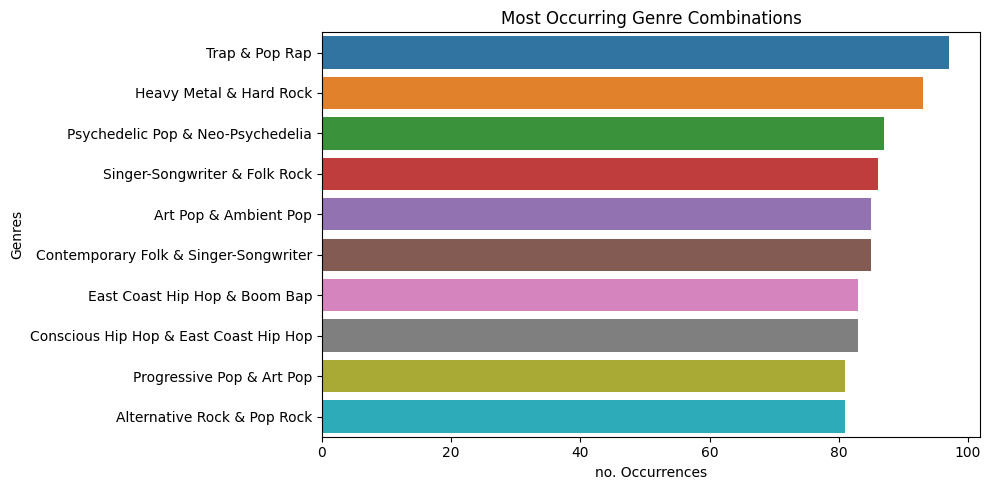

In [33]:
#Removing opposite order duplicates

top_25 = overlap_df.sort_values('counts', ascending=False)[:25]
top_25.reset_index(inplace=True)
top_25['code'] = top_25['index'] + ' & ' + top_25.pair
top_25['reverse_code'] = top_25.pair + ' & ' + top_25['index']

clean_25 = pd.DataFrame()

i=0
for n, row in  top_25.iterrows():
    
    if i>0:
        if row.reverse_code in clean_25.code.values:
            continue

    clean_25.loc[i, 'counts'] = row.counts
    clean_25.loc[i, 'code'] = row.code
    i+=1

plt.figure(figsize=(10,5))
sns.barplot(clean_25[:10], y= 'code', x = 'counts', hue='code')
plt.title('Most Occurring Genre Combinations')
plt.ylabel('Genres')
plt.xlabel('no. Occurrences')
plt.tight_layout()
plt.savefig('plots/co_oc/m_genres')

# plt.xticks(rotation=90);

In [34]:
df_exploded = df.explode('genres_list')

genre_counts_df = df_exploded['genres_list'].value_counts().reset_index()
genre_counts_df.columns = ['genre', 'counts']

ten_genres = genre_counts_df.genre[:10].values.tolist()
ten_genres

['Alternative Rock',
 'Singer-Songwriter',
 'Pop Rock',
 'Art Pop',
 'Indie Rock',
 'Neo-Psychedelia',
 'Art Rock',
 'Hard Rock',
 'Progressive Rock',
 'Experimental Rock']

In [35]:
df['new'] = df['genres'].str.replace(', ',',')
df['genres_list_new'] = df['new'].str.replace(',',', ').str.split(', ')

In [36]:
ohe_genres = pd.get_dummies(df['genres_list_new'].explode())
ohe_genres = ohe_genres.groupby('position').any()
ten_ohe_genres = ohe_genres[ten_genres]

<Axes: >

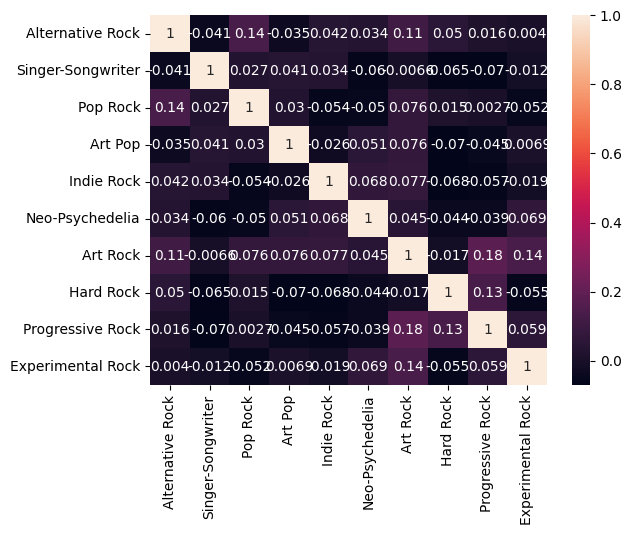

In [37]:
sns.heatmap(ten_ohe_genres.corr(), annot=True)

### Trying Dice instead

In [38]:
import numpy as np

In [39]:
def dice_coefficient(vec1, vec2):
    intersection = np.sum(vec1 & vec2)
    total = np.sum(vec1) + np.sum(vec2)
    return 2 * intersection / total

<Axes: >

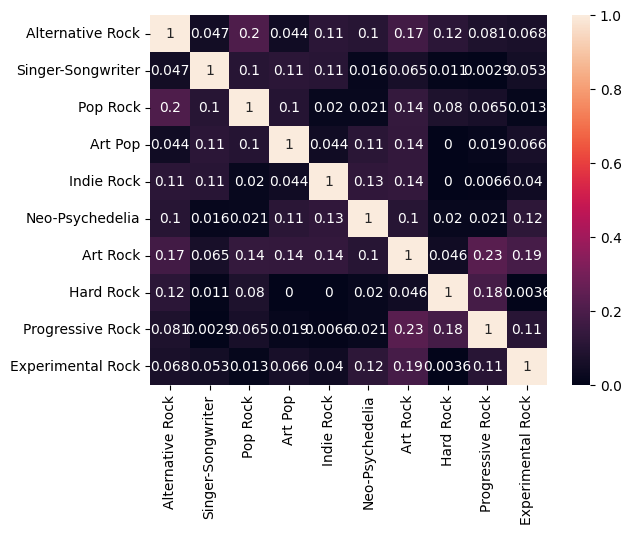

In [40]:
dices = pd.DataFrame()

for col in ten_ohe_genres:
    for col2 in ten_ohe_genres:
        dice = dice_coefficient(ten_ohe_genres[col], ten_ohe_genres[col2])
        dices.loc[col,col2] = dice


sns.heatmap(dices, annot=True)

#### Try Count instead

In [41]:
ten_ohe_genres.columns

Index(['Alternative Rock', 'Singer-Songwriter', 'Pop Rock', 'Art Pop',
       'Indie Rock', 'Neo-Psychedelia', 'Art Rock', 'Hard Rock',
       'Progressive Rock', 'Experimental Rock'],
      dtype='object')

In [42]:
df_new = pd.DataFrame(ohe_genres)
df_int = df_new.astype(int)

co_occurrence_matrix = df_int.T.dot(df_int)

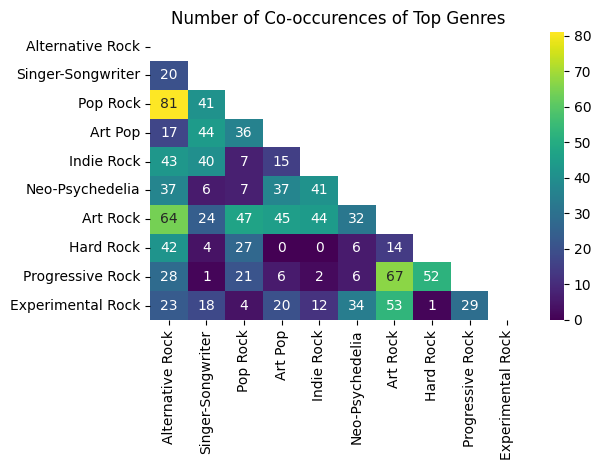

In [43]:
co_occurrence_genres = co_occurrence_matrix.loc[ten_ohe_genres.columns, ten_ohe_genres.columns]


co_occurrence_genres.loc[['Indie Rock','Art Pop'], 'Hard Rock'] =[1,1]
mask = np.triu(co_occurrence_genres)
# co_occurrence_genres.loc['Hard Rock',['Indie Rock','Art Pop']] =[0,0]
co_occurrence_genres
sns.heatmap(co_occurrence_genres, mask=mask, annot = True, cmap='viridis')
plt.title('Number of Co-occurences of Top Genres')
plt.tight_layout()
plt.savefig('plots/co_oc/genre_co')

In [44]:
# df_new = pd.DataFrame(ohe_genres)
# df_int = df_new.astype(int)

# co_occurrence_matrix = df_int.T.dot(df_int)

# co_occurrence_matrix
# plt.figure(figsize=(10, 8))
# mask = np.triu(co_occurrence_matrix)
# sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", mask=mask)
# # plt.show()

### Descriptor vs descriptor counts

the .explode() method acts on dataframes or series. 
On a dataframe, it takes a column as its argument. If the column contains lists as entries explode will rewrite the row and write new rows for each element of the list, with that column containing a single entry from the list.
In a series only the series will be rewritten.

Each element of a list like column is transformed to a separate row, with the other column values being copied to the new rows.

In [45]:
desc_counts = df['desc_list'].explode().value_counts()
desc_counts = desc_counts.reset_index().rename({'desc_list':'desc'},axis=1)
top_desc = desc_counts[:10]

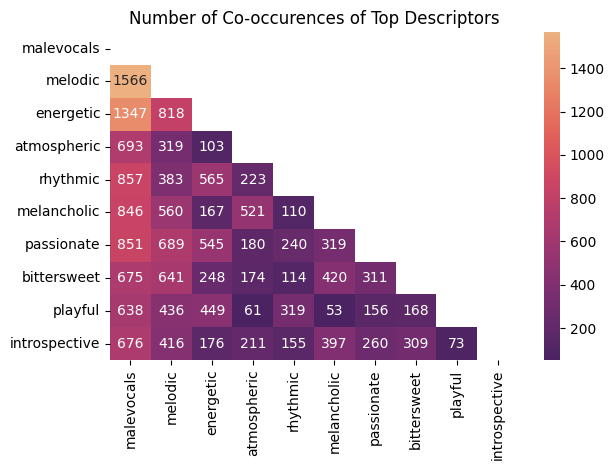

In [46]:
desc_counts = df['desc_list'].explode().value_counts()
desc_counts = desc_counts.reset_index().rename({'desc_list':'desc'},axis=1)
top_desc = desc_counts[:10]

ohe_exploded = pd.get_dummies(df.descriptors.str.split(', ').explode())
ohe_desc = ohe_exploded.groupby('position').any()
top_ohe_desc = ohe_desc[top_desc['desc']]

top_int_desc = top_ohe_desc.astype(int)
co_occurence_descs = top_int_desc.T.dot(top_int_desc)
mask = np.triu(co_occurence_descs)

sns.heatmap(co_occurence_descs, mask=mask, annot=True, fmt='', cmap='flare_r')
plt.title('Number of Co-occurences of Top Descriptors');
plt.tight_layout()
plt.savefig('plots/co_oc/desc_co')

In [47]:
3541/5000

0.7082

Not sure using corr on this data makes sense

In [48]:
# sns.heatmap(co_occurence_descs.corr(), annot=True, mask=mask,  fmt='.2f')

In [49]:
# sns.heatmap(co_occurence_descs.corr(method = 'spearman'), annot=True, mask=mask, fmt='.2f')

In [50]:
# sns.heatmap(co_occurence_descs.corr(method = 'kendall'), mask = mask, annot=True, fmt='.2f')

These make sense but chuck out terrible coefs

In [51]:
# sns.heatmap(top_ohe_desc.corr(method='kendall'), mask = mask, annot=True, fmt='.2f')

In [52]:
# sns.heatmap(top_ohe_desc.corr(method='spearman'), mask = mask, annot=True, fmt='.2f')

In [53]:
# sns.heatmap(top_ohe_desc.corr(method='pearson'), mask = mask, annot=True, fmt='.2f')

## Most Occurring descriptor Combinations

In [54]:
desc_overlap_dict = {}
ohe_desc
for descriptor in ohe_desc.columns:
    desc_overlaps = ohe_desc[ohe_desc[descriptor] == True].sum().sort_values(ascending=False).drop(descriptor)
    desc_overlap_dict[descriptor] = [desc_overlaps.index, desc_overlaps.values]

desc_overlap_df = pd.DataFrame(desc_overlap_dict)
desc_overlap_df = desc_overlap_df.T.explode([0,1])
desc_overlap_df.rename({0:'descriptor',1:'count'}, axis=1, inplace = True)

In [55]:
# top_desc_cooc

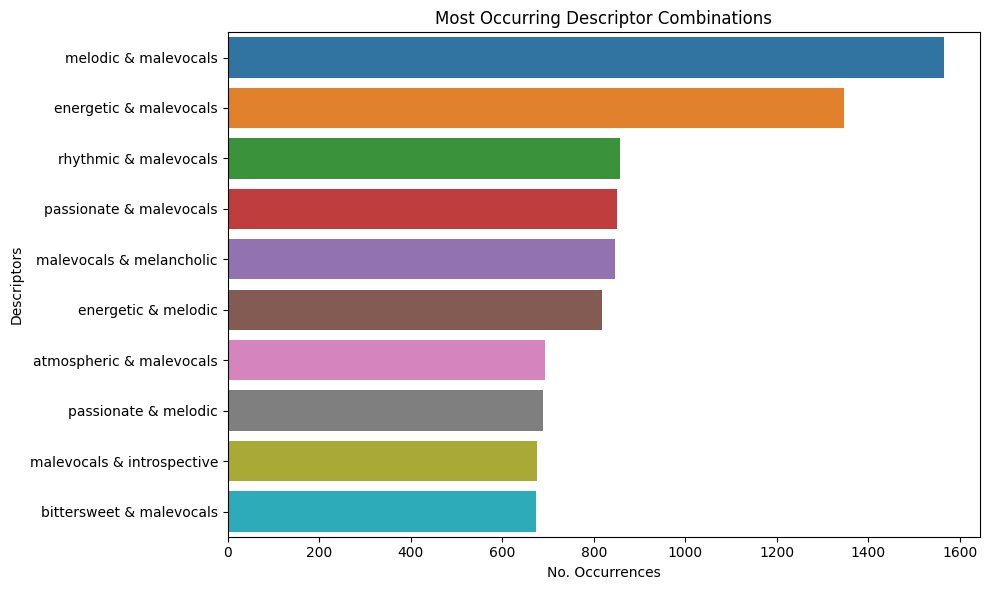

In [56]:
order_desc_cooc = desc_overlap_df.sort_values('count', ascending=False)
order_desc_cooc['key'] = order_desc_cooc.index + ' & ' + order_desc_cooc.descriptor
order_desc_cooc['reverse_key'] = order_desc_cooc.descriptor + ' & ' + order_desc_cooc.index

order_desc_cooc.reset_index(inplace=True)
top_desc_cooc = order_desc_cooc[:50]


for n, row in top_desc_cooc.iterrows():
    if row.key in top_desc_cooc[top_desc_cooc.index!=n].reverse_key:
        top_desc_cooc.drop(n, axis=0, inplace=True)

clean_desc_50=pd.DataFrame()
i=0
for n, row in top_desc_cooc.iterrows():

    other_data = top_desc_cooc[top_desc_cooc.index!=n]

    check = other_data.reverse_key.apply(lambda x: row.key in x)
    overlap_i = check[check].index

    if i>0:
        if row.reverse_key in clean_desc_50.key.values:
            continue
    
    clean_desc_50.loc[i, 'key'] = row.key
    clean_desc_50.loc[i, 'count'] = row['count']
    i+=1

plt.figure(figsize = (10,6))
sns.barplot(clean_desc_50[:10], x = 'count',y='key', hue = 'key')
plt.title('Most Occurring Descriptor Combinations')
plt.xlabel('No. Occurrences')
plt.ylabel('Descriptors')
plt.tight_layout()
plt.savefig('plots/co_oc/m_descs')

In [57]:
ten_desc = top_desc.desc.tolist()
ten_desc
five_desc = ten_desc[:5]
five_genre = ten_genres[:5]
print(five_desc, five_genre)
ten_label = []
ten_label.extend(five_desc)
ten_label.extend(five_genre)
ten_label

['malevocals', 'melodic', 'energetic', 'atmospheric', 'rhythmic'] ['Alternative Rock', 'Singer-Songwriter', 'Pop Rock', 'Art Pop', 'Indie Rock']


['malevocals',
 'melodic',
 'energetic',
 'atmospheric',
 'rhythmic',
 'Alternative Rock',
 'Singer-Songwriter',
 'Pop Rock',
 'Art Pop',
 'Indie Rock']

In [58]:
# df['gen_desc_list'] = 
df['gen_desc_list'] = df['genres_list'] + df['desc_list']
ohe_gen_desc = pd.get_dummies(df.explode('gen_desc_list').gen_desc_list)
ohe_gen_desc = ohe_gen_desc.groupby('position').any()

<Axes: >

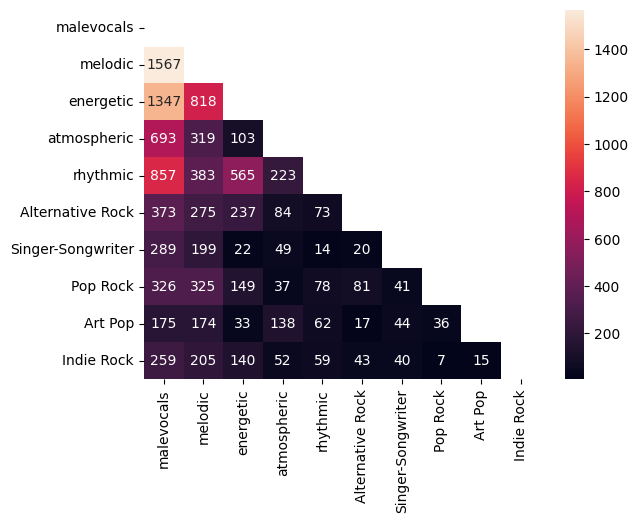

In [59]:
ohe_ten_label = ohe_gen_desc[ten_label]
int_ten_label = ohe_ten_label.astype(int)

sns.heatmap(int_ten_label.T.dot(int_ten_label), mask=mask, annot=True, fmt='')

# 5iii) Most popular descriptor for each genre?

In [60]:
#want to count the instances of overlap between genres and all descriptors
# for rows where genre is true if descriptor is true, add to count

In [61]:
genres = ohe_genres.columns
gen_desc_count_dict = {}

for genre in genres:
#     ohe_genres[ohe_genres[genre]==True]

    genre_i = ohe_genres[ohe_genres[genre] == True].index
    desc_of_gen = ohe_desc.loc[genre_i]
    desc_counts_of_gen = desc_of_gen.sum().sort_values(ascending=False)
    desc = desc_counts_of_gen[desc_counts_of_gen == desc_counts_of_gen.max()].index.sort_values()[0]
    gen_desc_count_dict[genre] = [desc, desc_counts_of_gen.values.max()]
    
# gen_desc_count_dict

In [62]:
gen_desc_df = pd.DataFrame(gen_desc_count_dict).T
gen_desc_df = gen_desc_df.reset_index().rename({'index':'genre',0:'descriptor',1:'count'}, axis=1)
# gen_desc_df.sort_values('count', ascending=False).reset_index(drop=True)[:40]

In [63]:
gen_desc_df.sort_values('count', ascending=False)

,genre,descriptor,count
25,Alternative Rock,malevocals,373
527,Pop Rock,malevocals,326
327,Hard Rock,malevocals,300
609,Singer-Songwriter,malevocals,289
46,Art Rock,malevocals,265
...,...,...,...
436,Microtonal Classical,atmospheric,1
438,Midtempo Bass,atmospheric,1
440,Min'yō,atmospheric,1
445,Mobb Music,anxious,1


# 5iv) Most popular descriptor and genre per year

Done it :)))

In [64]:
i=0
g_year_dict = {}
d_year_dict = {}

for year in sorted(df.year.unique()):
    
    df_year = df[df['year'] == year]
    
    top_g = df_year['genres_list_new'].explode().value_counts().head(1)
    top_d = df_year['desc_list'].explode().value_counts().head(1)
    g_year_dict[year] = [*top_g.index,*top_g.values]
    d_year_dict[year] = [*top_d.index,*top_d.values]

In [65]:
genre_year_df = pd.DataFrame(g_year_dict).T
desc_year_df = pd.DataFrame(d_year_dict).T


genre_year_df.rename({0:'Genre', 1: 'Count'}, axis=1, inplace=True)
desc_year_df.rename({0:'Descriptor', 1: 'Count'}, axis=1, inplace=True)

genre_year_df.sort_values('Count', ascending=False)

tab_md = genre_year_df.sort_values('Count', ascending=False).iloc[:10].to_markdown()

path = 'tables/year_genre_counts.txt'
with open(path, 'w') as f:
    f.write(tab_md)

In [66]:
tab_md = desc_year_df.sort_values('Count', ascending=False).iloc[:10].to_markdown()

path = 'tables/year_descriptor_counts.txt'
with open(path, 'w') as f:
    f.write(tab_md)

In [67]:
i=0
g_decade_dict = {}

for decade in sorted(df.decade.unique()):
    
    df_decade = df[df['decade'] == decade]
    
    top_g = df_decade['genres_list_new'].explode().value_counts().head(1)
    g_decade_dict[decade] = [*top_g.index,*top_g.values]

In [68]:
g_y_df = genre_year_df.reset_index()
g_y_df['decade'] = g_y_df['index'] // 10 * 10
g_y_df[g_y_df['decade'] == 1950]

,index,Genre,Count,decade
0,1954,Vocal Jazz,1,1950
1,1955,Standards,1,1950
2,1956,Standards,2,1950
3,1957,Hard Bop,6,1950
4,1958,Hard Bop,4,1950
5,1959,Cool Jazz,6,1950


In [69]:
genre_decade_df = pd.DataFrame(g_decade_dict).T
genre_decade_df.rename({0:'Genre', 1:'Count'}, axis = 1, inplace=True)
genre_decade_df

tab_md = genre_decade_df.iloc[:10].to_markdown()

path = 'tables/decade_genre_counts.txt'
with open(path, 'w') as f:
    f.write(tab_md)